In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import import_ipynb
import preprocessing
from sklearn.ensemble import IsolationForest
import seaborn as sns
from sklearn.decomposition import PCA

importing Jupyter notebook from preprocessing.ipynb


In [2]:
X_data=preprocessing.X_data
Y_data=preprocessing.Y_data

In [3]:
print(Y_data.shape, X_data.shape)

(247302,) (247302, 28)


In [4]:
iforest = IsolationForest(n_estimators=100, max_samples='auto', 
                          contamination=0.0005, max_features=1.0, 
                          bootstrap=False, n_jobs=-1, random_state=1)

In [5]:
pred = iforest.fit_predict(X_data)

In [6]:
X_data['anomaly']=pred
outliers=X_data.loc[X_data['anomaly']==-1]
outlier_index=list(outliers.index)
print(X_data['anomaly'].value_counts())
X_data=X_data.drop(['anomaly'],axis=1)

 1    247178
-1       124
Name: anomaly, dtype: int64


In [7]:
outliers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,Log amount,anomaly
6812,-23.066842,-25.640527,-3.080313,4.866932,6.901397,-4.074335,2.027345,-2.688652,3.402966,2.881873,...,-13.276034,-5.378106,3.312971,13.876221,-0.572177,5.525093,0.906980,3.358822,6.740201,-1
8610,-27.670569,-34.607649,2.243079,10.463020,34.099309,-23.496714,-26.548144,-0.779134,7.496577,6.605512,...,-12.834042,-4.651023,-1.627883,-11.669994,2.192626,-2.483069,1.788189,8.254376,4.011886,-1
9252,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,-13.136698,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.001000,-1
9487,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.001000,-1
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.001000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224569,-41.928738,-40.803981,-22.588759,11.844703,-8.729597,3.281296,14.203189,-5.245286,4.874533,1.363213,...,-14.157629,-5.862383,-3.433164,-21.303666,1.321750,-4.084350,-0.601799,-2.787339,5.298322,-1
226683,-23.980491,-25.705566,-4.103049,4.689646,8.874881,-6.994424,0.012693,-2.584214,1.546412,3.039631,...,-15.620332,-5.785111,2.147142,10.198370,0.500574,4.808122,0.580877,2.230930,5.377595,-1
229859,-18.065915,-20.943103,-4.581048,4.438972,7.625662,-6.192213,-4.715975,-3.867424,3.612216,4.162776,...,-18.598172,-6.218399,-0.532113,-13.277950,1.603244,-4.541069,-0.301654,10.135597,7.896360,-1
231454,-35.905105,-31.041362,-19.472908,9.216960,-18.863553,10.713326,16.687265,-9.609234,3.296559,-1.368484,...,-21.964898,-2.661701,-3.016337,-19.331255,0.987774,-2.180899,-0.172480,6.228140,8.175537,-1


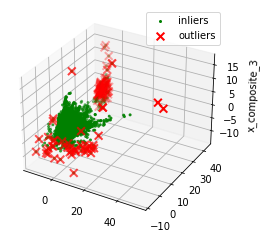

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X = scaler.fit_transform(X_data)
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()


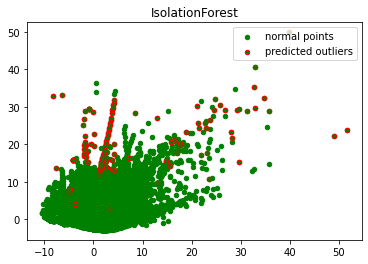

In [9]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_data)
res=pd.DataFrame(pca.transform(X_data))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

In [10]:
X_data=np.array(X_data)
Y_data=np.array(Y_data)

In [11]:
X_data=np.delete(X_data,outlier_index,axis=0)
Y_data=np.delete(Y_data,outlier_index,axis=0)

In [12]:
# scaler = StandardScaler()
# X_data = scaler.fit_transform(X_data)

In [13]:
print(Y_data.shape, X_data.shape)

(247178,) (247178, 28)


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [10, 100],
#            'max_depth' : [6, 8, 10, 12],
#            'min_samples_leaf' : [8, 12, 18],
#            'min_samples_split' : [8, 16, 20]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(X_data, Y_data)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

In [16]:
rf= RandomForestClassifier(n_estimators = 100, 
                                max_depth = 10,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)

In [17]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [18]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,Y_data, test_size=0.1, random_state=777, stratify=Y_data)

In [19]:
skf = StratifiedKFold(n_splits=10)
k=10

In [20]:
result_Y_val=[]
result_Y_val_pred=[]
model =  rf

i=0
for train_index,val_index in skf.split(X_train_val,Y_train_val):
    i=i+1
    print(str(i),"번째 cross validation")
    X_train = X_train_val[train_index]
    Y_train = Y_train_val[train_index]  
    X_val = X_train_val[val_index]
    Y_val = Y_train_val[val_index]
    
    sm = SMOTE()
    X_train_oversampled, Y_train_oversampled = sm.fit_sample(X_train, Y_train)
    model.fit(X_train_oversampled, Y_train_oversampled)

    Y_val_pred = rf.predict(X_val)
    result_Y_val.append(Y_val)
    result_Y_val_pred.append(Y_val_pred)



1 번째 cross validation
2 번째 cross validation
3 번째 cross validation
4 번째 cross validation
5 번째 cross validation
6 번째 cross validation
7 번째 cross validation
8 번째 cross validation
9 번째 cross validation
10 번째 cross validation


In [21]:
Y_pred=model.predict(X_test)

In [22]:
def evaluation(Y_test,y_pred):
    acc= accuracy_score(Y_test,y_pred)
    print("accuracy : {}".format(acc))
    prec= precision_score(Y_test,y_pred)
    print("precision : {}".format(prec))
    rec= recall_score(Y_test,y_pred)
    print("recall: {}".format(rec))
    f1= f1_score(Y_test,y_pred)
    print("F1-Score : {}".format(f1))
    auc_score=roc_auc_score(Y_test,y_pred)
    print("auc_score: {}".format(auc_score))
    

In [23]:
for i in range(k):
    print("{} 번째 cross validation".format(i+1))
    evaluation(result_Y_val[i],result_Y_val_pred[i])
    print("\n")

1 번째 cross validation
accuracy : 0.9984266834487099
precision : 0.4915254237288136
recall: 0.8529411764705882
F1-Score : 0.6236559139784946
auc_score: 0.9257952775923984


2 번째 cross validation
accuracy : 0.9981569720399173
precision : 0.4507042253521127
recall: 0.9411764705882353
F1-Score : 0.6095238095238095
auc_score: 0.9697103314583532


3 번째 cross validation
accuracy : 0.9981120201384519
precision : 0.43548387096774194
recall: 0.7941176470588235
F1-Score : 0.5625
auc_score: 0.8962709611127


4 번째 cross validation
accuracy : 0.997707453025263
precision : 0.38666666666666666
recall: 0.8529411764705882
F1-Score : 0.5321100917431193
auc_score: 0.9254351119161873


5 번째 cross validation
accuracy : 0.9981120201384519
precision : 0.43333333333333335
recall: 0.7647058823529411
F1-Score : 0.5531914893617021
auc_score: 0.8815875891145221


6 번째 cross validation
accuracy : 0.9982468758428481
precision : 0.4576271186440678
recall: 0.7941176470588235
F1-Score : 0.5806451612903226
auc_score: 0.

In [24]:
evaluation(Y_test,Y_pred)

accuracy : 0.9975321627963427
precision : 0.3614457831325301
recall: 0.7894736842105263
F1-Score : 0.49586776859504134
auc_score: 0.893663098183059


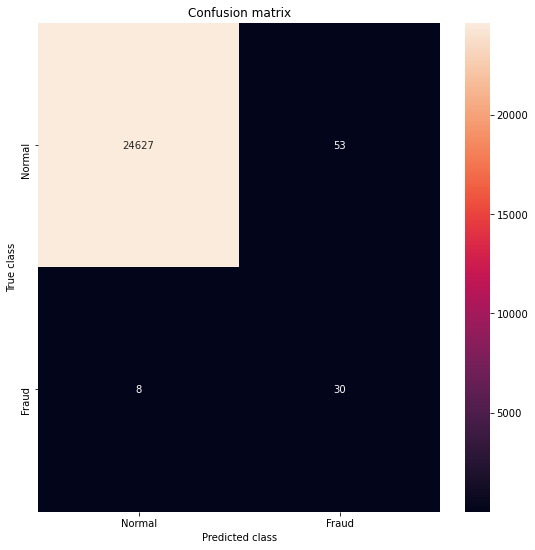

In [25]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
